r=1
Fixed point: 0
Unstable
Fixed point: 0.0
Unstable
r=2
Fixed point: 0
Unstable
Fixed point: 0.5
Unstable
r=3
Fixed point: 0
Unstable
Fixed point: 0.6666666666666666
Stable
r=4
Fixed point: 0
Unstable
Fixed point: 0.75
Stable
r=2
Converged to 0.49999999999999684 in 5 iterations
r=3
Did not converge after 1000 iterations
r=3.5
Did not converge after 1000 iterations
r=3.8
Did not converge after 1000 iterations
r=4.0
Converged to 4.5132487998553857e-07 in 360 iterations


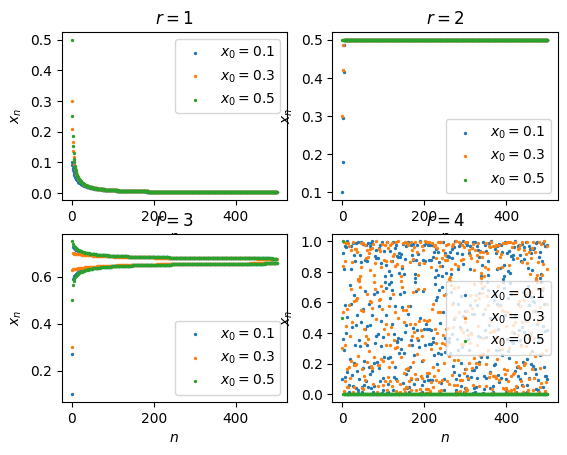

Period change from 1 to 2 at r=2.994
Period change from 2 to 4 at r=3.447
Period change from 4 to 8 at r=3.543
Chaos starts at r=3.565
Period is 3 at r=3.836


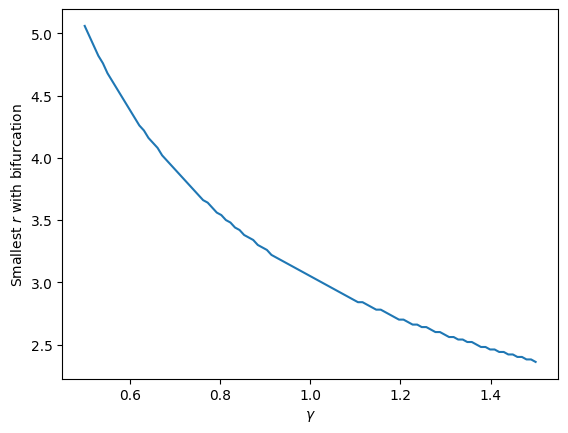

In [1]:
#!/usr/bin/env python

from numpy import linspace, unique, round, flatnonzero, mean, array, roll, nan
from matplotlib import pyplot as plt

# a
for r in [1,2,3,4]:
	print(f'{r=}')
	for x0 in [0, (r-1)/r]:
		print(f'Fixed point: {x0}')
		if r*(1-2*x0) < 0:
			print('Stable')
		else:
			print('Unstable')

# b
max_iter = 1000
convergence_threshold = 1e-6
x0 = 0.2
for r in [2, 3, 3.5, 3.8, 4.0]:
	print(f'{r=}')
	x = x_last = x0
	converge = False
	for i in range(max_iter):
		x = r*x*(1-x)
		if abs(x - x_last) < convergence_threshold:
			print(f'Converged to {x} in {i} iterations')
			converge = True
			break
		x_last = x
	if not converge:
		print(f'Did not converge after {max_iter} iterations')

# c
fig, axs = plt.subplots(2, 2)
for i, r in enumerate([1, 2, 3, 4]):
	ax = axs[i//2, i%2]
	ax.set_title(f'$r={r}$')
	for x0 in [0.1, 0.3, 0.5]:
		x = x0
		xs = [x0]
		for i in range(500):
			x = r*x*(1-x)
			xs.append(x)
		ax.scatter(range(len(xs)), xs, label=f'$x_0={x0}$', s=2)
	ax.legend()
	ax.set_xlabel('$n$')
	ax.set_ylabel('$x_n$')
plt.show()

# d
r_values = linspace(0.01, 4, 1000)
periods = []
for r in r_values:
	x = 0.2
	trajectory = []
	for i in range(500):
		if i > 450:
			trajectory.append(round(x, decimals=6))
		x = r*x*(1-x)
	periods.append(len(unique(trajectory)))
periods = array(periods)

def period_positions(n):
	arr = periods == n
	arr[arr & ~roll(arr, 1) & ~roll(arr, -1)] = False
	return flatnonzero(arr)

def find_period_change(n1, n2):
	i1 = period_positions(n1)[-1]
	i2 = period_positions(n2)[0]
	return (r_values[i1] + r_values[i2]) / 2

print(f'Period change from 1 to 2 at r={find_period_change(1, 2):.3f}')
print(f'Period change from 2 to 4 at r={find_period_change(2, 4):.3f}')
print(f'Period change from 4 to 8 at r={find_period_change(4, 8):.3f}')
print(f'Chaos starts at r={r_values[period_positions(8)[-1]+1]:.3f}')
print(f'Period is 3 at r={mean(r_values[period_positions(3)]):.3f}')

# e
gamma_values = linspace(0.5, 1.5, 100)
bifurcation_points = []
for gamma in gamma_values:
	bifurcation_start = False
	appended = False
	for r in linspace(1.02, 6, 250):
		x = 0.2
		trajectory = []
		for i in range(500):
			if i > 450:
				trajectory.append(round(x, decimals=6))
			x = r*x*(1-x**gamma)
		if len(unique(trajectory)) == 2:
			if bifurcation_start:
				bifurcation_points.append(r)
				appended = True
				break
			bifurcation_start = True
		else:
			bifurcation_start = False
	if not appended:
		bifurcation_points.append(nan)
plt.plot(gamma_values, bifurcation_points)
plt.xlabel(r'$\gamma$')
plt.ylabel('Smallest $r$ with bifurcation')
plt.show()